In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
csv_adbe = "C:/Business analysis/Project/IS403.O22.HTCLL_Nhom07/Dataset/ADBE_Stock.csv"
df_adbe = pd.read_csv(csv_adbe, thousands=',')

In [3]:
df_adbe.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,1/2/2019,ADBE,224.570007,224.570007,226.169998,219.000000,219.910004,2784100
1,1/3/2019,ADBE,215.699997,215.699997,223.630005,215.149994,220.880005,3663500
2,1/4/2019,ADBE,226.190002,226.190002,227.649994,217.479996,219.839996,4043400
3,1/7/2019,ADBE,229.259995,229.259995,232.600006,227.289993,229.949997,3638500
4,1/8/2019,ADBE,232.679993,232.679993,233.770004,228.330002,232.649994,3685900


In [4]:
df_adbe.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1.316000e+03
mean,430.226794,430.226794,435.516800,424.449514,430.128344,2.987187e+06
std,117.382861,117.382861,118.488096,116.266418,117.471892,1.731461e+06
min,215.699997,215.699997,223.630005,215.149994,219.839996,5.892000e+05
25%,330.467514,330.467514,334.264999,326.092499,329.127510,2.032575e+06
50%,431.709991,431.709991,438.309998,424.485001,432.255005,2.579500e+06
75%,514.287521,514.287521,520.460007,509.157501,514.032501,3.437800e+06
max,688.369995,688.369995,699.539978,678.909973,696.280029,2.784020e+07


In [5]:
df_adbe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1316 non-null   object 
 1   Symbol     1316 non-null   object 
 2   Adj Close  1316 non-null   float64
 3   Close      1316 non-null   float64
 4   High       1316 non-null   float64
 5   Low        1316 non-null   float64
 6   Open       1316 non-null   float64
 7   Volume     1316 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 82.4+ KB


In [6]:
# Convert object to datetime64
df_adbe['Date'] = df_adbe['Date'].apply(pd.to_datetime)
# Sort data by date time value
df_adbe = df_adbe.sort_values(by="Date").reset_index(drop=True)
df_adbe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1316 non-null   datetime64[ns]
 1   Symbol     1316 non-null   object        
 2   Adj Close  1316 non-null   float64       
 3   Close      1316 non-null   float64       
 4   High       1316 non-null   float64       
 5   Low        1316 non-null   float64       
 6   Open       1316 non-null   float64       
 7   Volume     1316 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 82.4+ KB


In [7]:
df_adbe.Close

0       224.570007
1       215.699997
2       226.190002
3       229.259995
4       232.679993
           ...    
1311    521.190002
1312    519.140015
1313    511.250000
1314    499.519989
1315    507.230011
Name: Close, Length: 1316, dtype: float64

In [8]:
df_adbe['Prev_close'] = df_adbe.shift(1)['Close']
df_adbe.Prev_close

0              NaN
1       224.570007
2       215.699997
3       226.190002
4       229.259995
           ...    
1311    513.859985
1312    521.190002
1313    519.140015
1314    511.250000
1315    499.519989
Name: Prev_close, Length: 1316, dtype: float64

In [9]:
df_adbe.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Prev_close
0,2019-01-02,ADBE,224.570007,224.570007,226.169998,219.000000,219.910004,2784100,NaN
1,2019-01-03,ADBE,215.699997,215.699997,223.630005,215.149994,220.880005,3663500,224.570007
2,2019-01-04,ADBE,226.190002,226.190002,227.649994,217.479996,219.839996,4043400,215.699997
3,2019-01-07,ADBE,229.259995,229.259995,232.600006,227.289993,229.949997,3638500,226.190002
4,2019-01-08,ADBE,232.679993,232.679993,233.770004,228.330002,232.649994,3685900,229.259995


In [10]:
df_adbe['Close_change'] = df_adbe.progress_apply(
    lambda row: 0 if np.isnan(row.Prev_close) else row.Close - row.Prev_close,
    axis = 1
)

  0%|          | 0/1316 [00:00<?, ?it/s]

In [11]:
df_adbe.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Prev_close,Close_change
0,2019-01-02,ADBE,224.570007,224.570007,226.169998,219.000000,219.910004,2784100,NaN,0.000000
1,2019-01-03,ADBE,215.699997,215.699997,223.630005,215.149994,220.880005,3663500,224.570007,-8.870010
2,2019-01-04,ADBE,226.190002,226.190002,227.649994,217.479996,219.839996,4043400,215.699997,10.490005
3,2019-01-07,ADBE,229.259995,229.259995,232.600006,227.289993,229.949997,3638500,226.190002,3.069992
4,2019-01-08,ADBE,232.679993,232.679993,233.770004,228.330002,232.649994,3685900,229.259995,3.419998


In [12]:
rows = []
for _,row in tqdm(df_adbe.iterrows(), total=df_adbe.shape[0]):
    row_data = dict(
        day = row.Date.day,
        month = row.Date.month,
        year = row.Date.year,
        open = row.Open,
        low = row.Close,
        high = row.High, 
        close = row.Close, 
        volume = row.Volume,
        close_change = row.Close_change
    )
    rows.append(row_data)
features_adbe = pd.DataFrame(rows)

  0%|          | 0/1316 [00:00<?, ?it/s]

In [13]:
features_adbe.head()

,day,month,year,open,low,high,close,volume,close_change
0,2,1,2019,219.910004,224.570007,226.169998,224.570007,2784100,0.000000
1,3,1,2019,220.880005,215.699997,223.630005,215.699997,3663500,-8.870010
2,4,1,2019,219.839996,226.190002,227.649994,226.190002,4043400,10.490005
3,7,1,2019,229.949997,229.259995,232.600006,229.259995,3638500,3.069992
4,8,1,2019,232.649994,232.679993,233.770004,232.679993,3685900,3.419998


In [14]:
def detect_outlier(df, col):
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(df[(df[col] < lower_bound) | (df[col] > upper_bound)])

In [15]:
detect_outlier(features_adbe, 'close')

Empty DataFrame
Columns: [day, month, year, open, low, high, close, volume, close_change]
Index: []


In [16]:
detect_outlier(features_adbe, 'volume')

      day  month  year        open         low        high       close   
50     15      3  2019  258.029999  257.089996  260.000000  257.089996  \
80     29      4  2019  286.459992  286.140015  291.709992  286.140015   
116    19      6  2019  287.000000  291.209992  292.000000  291.209992   
117    20      6  2019  293.250000  302.109985  302.660004  302.109985   
179    18      9  2019  275.350006  279.720001  280.290008  279.720001   
...   ...    ...   ...         ...         ...         ...         ...   
1291   20      2  2024  531.500000  541.909973  545.880005  541.909973   
1308   14      3  2024  578.000000  570.450012  579.539978  570.450012   
1309   15      3  2024  499.640015  492.459992  503.130005  492.459992   
1310   18      3  2024  495.549988  513.859985  515.729981  513.859985   
1311   19      3  2024  509.890015  521.190002  522.679993  521.190002   

        volume  close_change  
50    12110500    -10.600006  
80     5592400      4.180023  
116    9738600    

In [17]:
detect_outlier(features_adbe, 'close_change')

      day  month  year        open         low        high       close   
297     9      3  2020  311.679993  305.790008  322.440002  305.790008  \
298    10      3  2020  318.980011  332.380005  332.940002  332.380005   
300    12      3  2020  290.410004  285.000000  310.130005  285.000000   
301    13      3  2020  312.880005  335.500000  336.000000  335.500000   
302    16      3  2020  288.359985  286.029999  307.109985  286.029999   
...   ...    ...   ...         ...         ...         ...         ...   
1282    6      2  2024  625.580017  607.140015  626.460022  607.140015   
1290   16      2  2024  589.900024  546.659973  590.140015  546.659973   
1301    5      3  2024  562.599976  544.840027  564.190002  544.840027   
1309   15      3  2024  499.640015  492.459992  503.130005  492.459992   
1310   18      3  2024  495.549988  513.859985  515.729981  513.859985   

        volume  close_change  
297    5291900    -30.979981  
298    5973700     26.589996  
300    7230200    

In [18]:
train_size = int(0.7 * len(features_adbe))
test_size = int(0.2 * len(features_adbe))
val_size = len(features_adbe) - train_size - test_size

train_adbe_df = features_adbe[:train_size]
test_adbe_df = features_adbe[train_size:train_size+test_size]
validation_adbe_df = features_adbe[train_size+test_size:]

In [19]:
#Quá trình Training
x_train = np.array(train_adbe_df.index).reshape(-1, 1)
y_train = np.array(train_adbe_df['close'])
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
# In các thông số của mô hình
print("Hệ số hồi quy (slope):", model.coef_)
print("Sai số chệch (intercept):", model.intercept_)

Hệ số hồi quy (slope): [0.32544681]
Sai số chệch (intercept): 271.80793373412666


In [20]:
#Quá trình testing
x_test = np.array(test_adbe_df.index).reshape(-1, 1)
y_test = np.array(test_adbe_df['close'])
y_pred = model.predict(x_test)

#Quá trình Validate
x_val= np.array(validation_adbe_df.index).reshape(-1, 1)
y_val = np.array(validation_adbe_df['close'])
y_pred_val =  model.predict(x_val)

In [21]:
#Quá trình tạo index predict 30 ngày tiếp theo
last_index = features_adbe.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[700.09592978 700.42137658 700.74682339 701.0722702  701.397717
 701.72316381 702.04861061 702.37405742 702.69950422 703.02495103
 703.35039783 703.67584464 704.00129145 704.32673825 704.65218506
 704.97763186 705.30307867 705.62852547 705.95397228 706.27941908
 706.60486589 706.9303127  707.2557595  707.58120631 707.90665311
 708.23209992 708.55754672 708.88299353 709.20844033 709.53388714]


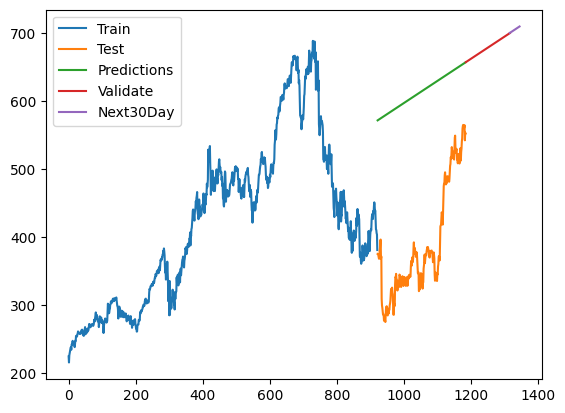

In [22]:
#Vẽ hình
plt.plot(train_adbe_df.index, train_adbe_df['close'])
plt.plot(test_adbe_df.index, test_adbe_df['close'])
plt.plot(test_adbe_df.index, y_pred)
plt.plot(validation_adbe_df.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()